<a href="https://colab.research.google.com/github/Zolinad/IA_Regressao_Linear/blob/main/CrashCourse_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crash Course IA - Regressão Linear
Este é o primeiro exercício prático do Crash Course de IA, uma versão online e acessível para todos. <br> Neste tutorial, vamos treinar um modelo de regressão linear para predição de valores contínuos. <br><br>



In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

# Download do Dataset

In [3]:
#!pip3 install wget
#!wget https://raw.githubusercontent.com/Zolinad/Inteligencia_Artificial/main/RegressaoLinear/FuelConsumptionCo2.csv

#Carregar o dataset para um Dataframe (Pandas)

In [4]:
# Cria um dataset chamado 'df' que receberá os dados do csv

#df = pd.read_csv("FuelConsumptionCo2.csv") # Carrega o dataset CSV se este já estiver salvo no diretório de trabalho atual (onde este notebook também está salvo).
df = pd.read_csv("https://raw.githubusercontent.com/Zolinad/Inteligencia_Artificial/main/RegressaoLinear/FuelConsumptionCo2.csv") # carrega o dataset diretamente da fonte sem download.

#EXIBE A ESTRUTURA DO DATAFRAME
print(df.head())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

# Exibe o resumo do Dataset

In [5]:
print(df.describe())

       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000 

# Selecionar apenas as features do Motor e CO2

In [6]:
motores =  df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]
print(motores.head())

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5


#Dividir o dataset em dados de treinamento e dados de teste
neste casos vamos usar o train_test_split do scikitlearn

In [7]:
motores_treino, motores_test, co2_treino, co2_teste = train_test_split(motores, co2, test_size=0.2, random_state=42)
print(type(motores_treino))

<class 'pandas.core.frame.DataFrame'>


#Exibir a correlação entre as features do dataset de treinamento

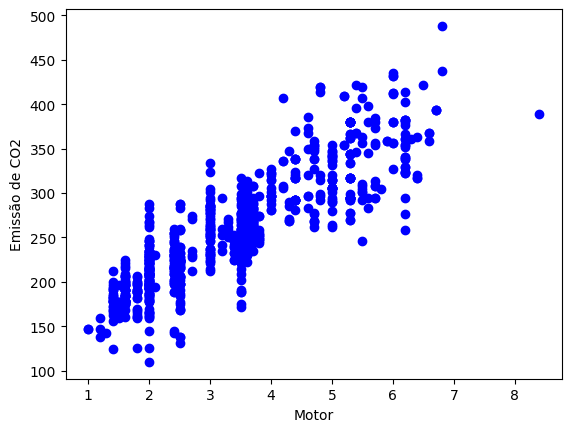

In [8]:
plt.scatter(motores_treino, co2_treino, color='blue')
plt.xlabel("Motor")
plt.ylabel("Emissão de CO2")
plt.show()

# Vamos treinar o modelo de regressão linear

In [9]:
# CRIAR UM MODELO DE TIPO DE REGRESSÃO LINEAR
modelo =  linear_model.LinearRegression()

# TREINAR O MODELO USANDO O DATASET DE TESTE
# PARA ENCONTRAR O VALOR DE A E B (Y = A + B.X)
modelo.fit(motores_treino, co2_treino)


LinearRegression()

#Exibir os coeficientes (A e B)

In [10]:
print('(A) Intercepto: ', modelo.intercept_)
print('(B) Inclinação: ', modelo.coef_)

(A) Intercepto:  [126.28970217]
(B) Inclinação:  [[38.99297872]]


# Vamos exibir a nossa reta de regressão no dataset de treino

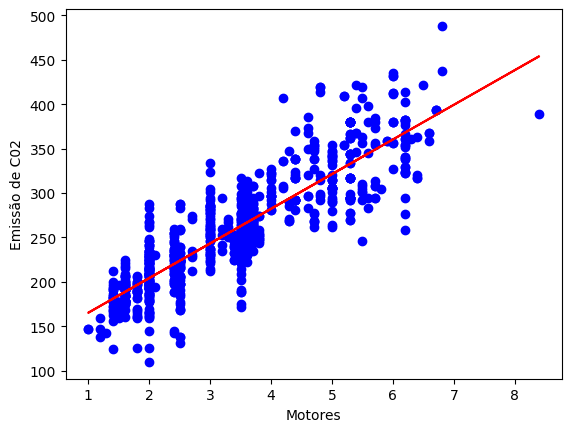

In [11]:
plt.scatter(motores_treino, co2_treino, color='blue')
plt.plot(motores_treino, modelo.coef_[0][0]*motores_treino + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Motores")
plt.show()

# Vamos executar o nosso modelo no dataset de teste

In [12]:
#Primeiro a gente tem que fazer as predições usando o modelo e base de teste
predicoesCo2 = modelo.predict(motores_test)

# Vamos exibir a nossa reta de regressão no dataset de teste

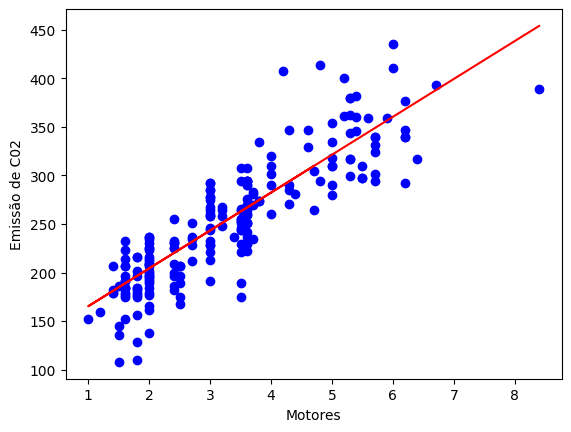

In [13]:
plt.scatter(motores_test, co2_teste, color='blue')
plt.plot(motores_test, modelo.coef_[0][0]*motores_test + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Motores")
plt.show()

# Vamos avaliar o modelo

In [14]:
#Agora é mostrar as métricas
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predicoesCo2 - co2_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(co2_teste, predicoesCo2))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(co2_teste, predicoesCo2))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(co2_teste, predicoesCo2)))
print("R2-score: %.2f" % r2_score(predicoesCo2 , co2_teste) )

Soma dos Erros ao Quadrado (SSE): 210991 
Erro Quadrático Médio (MSE): 985.94
Erro Médio Absoluto (MAE): 24.10
Raiz do Erro Quadrático Médio (RMSE): 31.40 
R2-score: 0.68
